In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
%config Completer.use_jedi= False

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=300, n_features=2, centers=2, cluster_std=1, random_state=101)

In [5]:
X,y = data

C:\Users\Mein Pc\.conda\envs\nlp_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


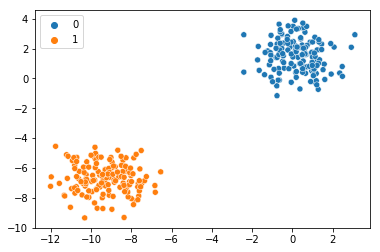

In [6]:
sns.scatterplot(X[:,0], X[:,1], hue=y)

In [7]:
np.random.seed(seed=101) 
Z_noise = np.random.normal(size = len(X))

In [8]:
Z_noise = pd.Series(Z_noise)

In [9]:
feature = pd.concat([ pd.DataFrame(X), Z_noise], axis=1)

In [33]:
feature.columns= ['X1','X2','X3']

In [34]:
feature.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


In [35]:
from mpl_toolkits.mplot3d import Axes3D

In [36]:
# %matplotlib notebook

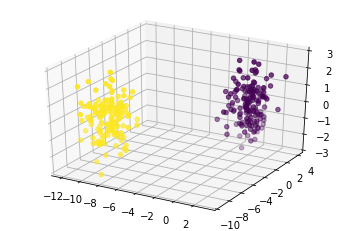

In [37]:
figure = plt.figure()
ax = figure.add_subplot(111, projection = '3d')
ax.scatter( feature['X1'],feature['X2'],feature['X3'], c= y)

In [38]:
# first 2 dimension are making cluster , and quite seperable, but 3rd dimension has brought the noise
# lets see if Autoencoder can help reducing the dimension 

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GRU
from tensorflow.keras.optimizers import SGD


In [40]:
# making the autoencoder


In [41]:
encoder = Sequential()
encoder.add( Dense(units=2, activation='relu', input_shape= [3]))

In [42]:
decoder = Sequential()
decoder.add(Dense(units=3, activation='relu', input_shape= [2]))

In [43]:
autoencoder = Sequential([encoder, decoder])

In [44]:
autoencoder.compile(loss= 'mse', optimizer=SGD(lr=1.5))

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
sc = MinMaxScaler()

In [47]:
X_scaled = sc.fit_transform(feature)

In [48]:
autoencoder.fit(X_scaled,X_scaled, epochs=5)

Epoch 1/5
10/10 [==============================] - 0s 695us/step - loss: 0.2649
Epoch 2/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2486
Epoch 3/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2339
Epoch 4/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2230
Epoch 5/5
10/10 [==============================] - 0s 1ms/step - loss: 0.2201


In [49]:
# training happened on both (encoder and decoder) , which means both has got their bias and weight.
# both can predict seperately.
# will predict with encoder only to find the values at hidden layer. 

In [50]:
encoded_2dim = encoder.predict(X_scaled)

In [51]:
encoded_2dim.shape

(300, 2)

C:\Users\Mein Pc\.conda\envs\nlp_course\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


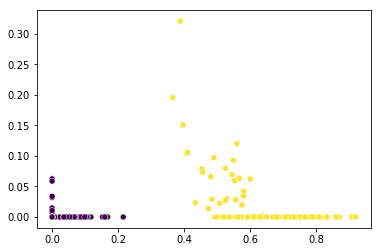

In [52]:
sns.scatterplot(list(encoded_2dim[:,0]),list(encoded_2dim[:,1]), c= y)

In [53]:
encoded_2dim[:,0]

array([8.11568081e-01, 0.00000000e+00, 5.20383120e-02, 5.80629826e-01,
       8.16393852e-01, 7.34460115e-01, 0.00000000e+00, 7.64305592e-01,
       0.00000000e+00, 1.21517181e-02, 7.22049296e-01, 7.42415786e-01,
       0.00000000e+00, 5.07525086e-01, 0.00000000e+00, 5.87023020e-01,
       3.81754041e-02, 6.02328181e-02, 2.15465546e-01, 0.00000000e+00,
       7.65855789e-01, 9.50557590e-02, 0.00000000e+00, 5.52816153e-01,
       7.87074268e-01, 0.00000000e+00, 1.96710229e-02, 0.00000000e+00,
       7.30328500e-01, 7.58118033e-01, 7.70228386e-01, 5.79608440e-01,
       0.00000000e+00, 0.00000000e+00, 7.46032000e-01, 6.17160618e-01,
       0.00000000e+00, 0.00000000e+00, 3.33565474e-02, 1.67954117e-01,
       0.00000000e+00, 6.26185358e-01, 0.00000000e+00, 5.48849881e-01,
       0.00000000e+00, 7.38072276e-01, 7.30301380e-01, 7.02147186e-01,
       8.02348495e-01, 5.28857768e-01, 6.87462687e-01, 6.25299156e-01,
       0.00000000e+00, 1.09217286e-01, 5.99449873e-03, 0.00000000e+00,
      